In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deg_from_opp = np.arange(-135, 135, 0.1)
distances = [1.1, 2, 5, 10, 30, 45, 65]

In [3]:
m_sun = 1.99e33 # g
G = 6.67259e-8  # cm^3 g^−1 s^−2
r_au = 1.496e13   # cm 

circ_velocity_au = -1.0 * np.sqrt(G * m_sun / r_au) # cm/s
print(circ_velocity_au)

circ_velocity_atD = circ_velocity_au / np.sqrt(distances)
print(circ_velocity_atD)

-2979256.952996604
[-2840610.04843208 -2106652.79436107 -1332364.21386786  -942123.77063625
  -543935.41258678  -444121.40462262  -369531.34543799]


In [4]:
rad2deg = 180.0/np.pi
c2 = 1.0 / r_au * 3600 * 3600 * rad2deg
c2

4.963591594181463e-05

In [5]:
arcsecPerDeg = 1 * 60 * 60 * 60
hourPerDay = 1 * 24 * 60
arcsecPerDeg / hourPerDay

150.0

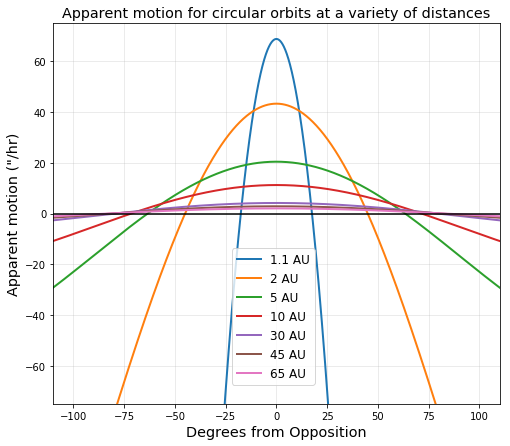

In [7]:
plt.figure(figsize=(8, 7))
deg = False
for d in distances:
    # Mu in "/hr"
    # make sure to use r = d-1 .. not r=d
    r = d - 1
    relvel = circ_velocity_au * (1.0 / np.sqrt(d) - np.cos(np.radians(deg_from_opp))) # cm/s
    mu = relvel * c2 / r
    if deg:
        mu = mu / arcsecPerDeg * hourPerDay
    plt.plot(deg_from_opp, mu, label='%s AU' %(d), linewidth=2)

plt.xlabel('Degrees from Opposition', fontsize='x-large')
if deg:
    plt.ylabel('Apparent motion (deg/day)', fontsize='x-large')
else:
    plt.ylabel('Apparent motion ("/hr)', fontsize='x-large')

plt.axhline(0, color='k')
plt.legend(loc=(0.4, 0.05), numpoints=1, fancybox=True, fontsize='large')

if deg:
    plt.ylim(-0.5, 0.5)
else:
    plt.ylim(-0.5 * arcsecPerDeg / hourPerDay, 0.5 * arcsecPerDeg / hourPerDay)
plt.xlim(-110, 110)
plt.xlim()
plt.title('Apparent motion for circular orbits at a variety of distances', fontsize='x-large')
plt.grid(True, alpha=0.3)